In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Bologna/final_results/reduced_features.csv'
data = pd.read_csv(file_path)

# Shuffle the dataset
data = data.sample(frac=1, random_state=42)

# Split features (X) and target variable (y)
X = data.drop(['Unnamed: 0', 'date', 'lat', 'lon', 'panoID', 'probability '], axis=1)  # Features
y = data['probability ']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mounted at /content/drive
Mean Squared Error: 0.08031936258882011


In [5]:
import os
# Save coefficients DataFrame to a CSV file
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.to_csv('/content/drive/MyDrive/Bologna/final_results/coefficients.csv', index=False)
print(coefficients )

          Feature  Coefficient
0            wall     0.000222
1        building     0.002549
2             sky    -0.002154
3        greenery    -0.002299
4   terrain type     -0.006509
5        vehicles    -0.005802
6           path      0.002901
7          person     0.019421
8           fence     0.006177
9       signboard    -0.015542
10           pole     0.034855
11        bicycle     0.051989


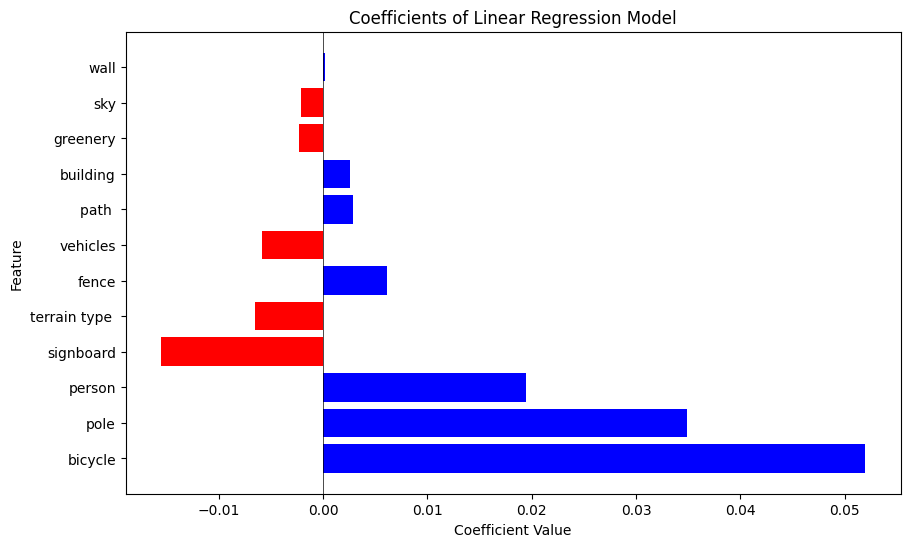

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sort coefficients by magnitude
coefficients_sorted = coefficients.copy()
coefficients_sorted['Abs_Coefficient'] = abs(coefficients_sorted['Coefficient'])
coefficients_sorted = coefficients_sorted.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficients with positive values in green and negative values in red
plt.figure(figsize=(10, 6))
colors = ['blue' if c > 0 else 'red' for c in coefficients_sorted['Coefficient']]
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.axvline(x=0, color='black', linewidth=0.5)  # Add vertical line at zero
plt.show()